<a href="https://colab.research.google.com/github/Vjarvis18/GeoPython/blob/main/Mumbai_RoadNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.9 MB/s eta 0:00:00


In [5]:
import osmnx as ox
import matplotlib.pyplot as plt

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((72.77633 19.22495, 72.77637 19.22404...",72.776333,18.991648,72.981748,19.269477,354030949,relation,7964375,19.054999,72.869203,boundary,administrative,10,0.709786,city,Mumbai,"Mumbai, Maharashtra, India"


<Axes: title={'center': 'Administrative Boundary pf Mumbai, Maharashtra'}>

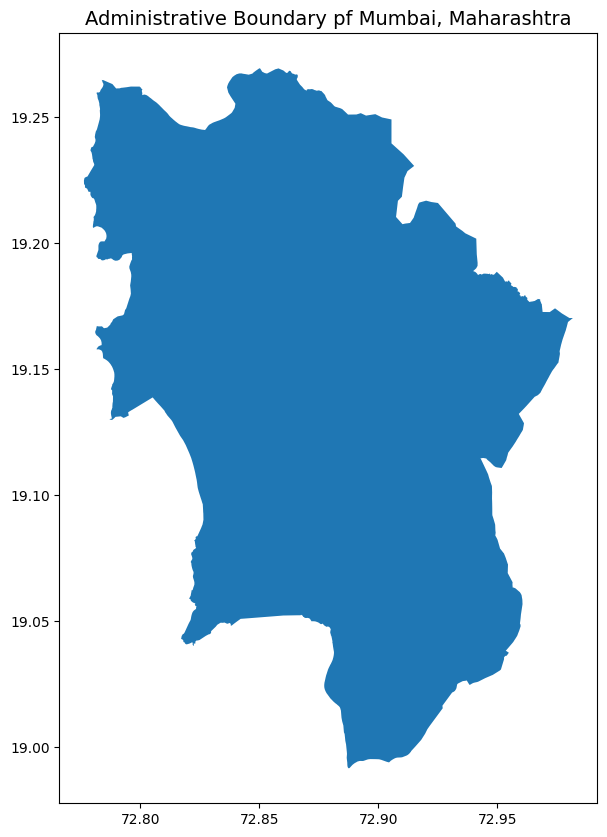

In [6]:
city = 'Mumbai, Maharashtra'
f, ax = plt.subplots(1,1, figsize= (10,10))
admin = ox.geocode_to_gdf(city)
ax.set_title(f"Administrative Boundary pf {city}", fontsize = 14)
display(admin)
admin.plot(ax=ax)


In [8]:
Roadnet = ox.graph_from_polygon(admin.geometry.to_list()[0], network_type='drive')
nodes = Roadnet.number_of_nodes()
edges = Roadnet.number_of_edges()
print(f"Number of Nodes: {nodes}")
print(f"Number of Edges: {edges}")

Number of Nodes: 18609
Number of Edges: 42870


In [9]:
nodesfdf, edgesdf = ox.graph_to_gdfs(Roadnet)

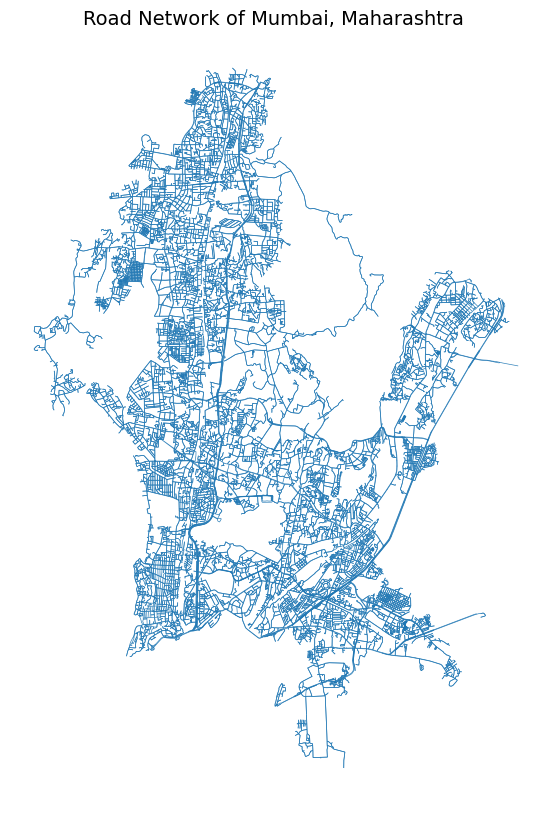

In [10]:
f, ax = plt.subplots(1,1, figsize = (10,10))
edgesdf.plot(ax=ax, linewidth = 0.5, alpha = 0.9)
ax.set_title(f"Road Network of {city} ", fontsize = 14)
ax.axis('off')
plt.show()


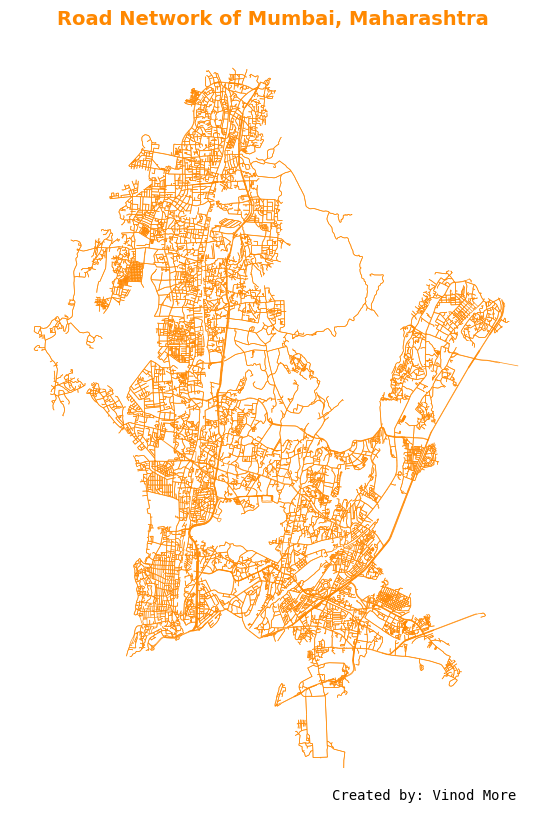

In [15]:
f, ax = plt.subplots(1,1, figsize = (10,10))
color_palette = {"Neon":"#ff8800", "Background":"#33a100"}
edgesdf.plot(ax=ax, linewidth = 0.5, alpha = 0.9, color = color_palette["Neon"])
ax.set_facecolor(color_palette["Background"])
ax.set_title(f"Road Network of {city} ", fontsize = 14, color=color_palette['Neon'], weight = 'bold', y = 1, family = 'sans-serif')
plt.text(0.95, 0, "Created by: Vinod More", color='black', fontsize = 10, transform = ax.transAxes, ha = 'right', va='bottom', family='monospace')

plt.savefig("Road_Network_Mumbai.jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig("Road_Network_Mumbai.pdf", dpi = 300, bbox_inches = 'tight')
ax.axis('off')
plt.show()